<a href="https://colab.research.google.com/github/sejunssi/GNN_for_EHR/blob/master/%ED%95%99%EC%8A%B5%ED%99%9C%EB%8F%991.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
!pip install mpld3
import mpld3

     |████████████████████████████████| 1.0MB 4.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=5aac74b11ebea015d57377e1de6a51ae945e594c3e6442977c3c93c5d6528e86
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
os.chdir('/content/gdrive/My Drive/AI/')

In [5]:
import glob
import os

file_list = glob.glob(os.path.join(os.getcwd(), "raw_text2", "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())

print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
print(corpus[1])

Structural Analysis of Recombinant Human Preproinsulins by Structure Prediction, Molecular Dynamics, and Protein-Protein Docking
More effective production of human insulin is important, because insulin is the main medication that is used to treat multiple types of diabetes and because many people are suffering from diabetes. The current system of insulin production is based on recombinant DNA technology, and the expression vector is composed of a preproinsulin sequence that is a fused form of an artificial leader peptide and the native proinsulin. It has been reported that the sequence of the leader peptide affects the production of insulin. To analyze how the leader peptide affects the maturation of insulin structurally, we adapted several in silico simulations using 13 artificial proinsulin sequences. Three-dimensional structures of models were predicted and compared. Although their sequences had few differences, the predicted structures were somewhat different. The structures were r

In [8]:
print(corpus[2])

A Short Report on the Markov Property of DNA Sequences on 200-bp Genomic Units of Roadmap Genomics ChromHMM Annotations: A Computational Perspective
The non-coding DNA in eukaryotic genomes encodes a language that programs chromatin accessibility, transcription factor binding, and various other activities. The objective of this study was to determine the effect of the primary DNA sequence on the epigenomic landscape across a 200-base pair of genomic units by integrating 127 publicly available ChromHMM BED files from the Roadmap Genomics project. Nucleotide frequency profiles of 127 chromatin annotations stratified by chromatin variability were analyzed and integrative hidden Markov models were built to detect Markov properties of chromatin regions. Our aim was to identify the relationship between DNA sequence units and their chromatin variability based on integrated ChromHMM datasets of different cell and tissue types.
Since large-scale epigenetic datasets such as Encyclopedia of DNA E

In [10]:
# load nltk's English stopwords as variable called 'stopwords'
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [12]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [13]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [14]:
import os
all_files = os.listdir("raw_text2/")
print(all_files)

['gni-1-1-7.txt', 'gni-15-4-142.txt', 'gni-16-4-e27.txt', 'gni-7-2-111.txt', 'gni-11-4-191.txt', 'gni-1-2-87.txt', 'gni-14-2-62.txt', 'gni-13-3-81.txt', 'gni-4-3-133.txt', 'gni-4-4-170.txt', 'gni-4-3-110.txt', 'gni-15-4-170.txt', 'gni-14-4-234.txt', 'gni-14-1-2.txt', 'gni-12-4-181.txt', 'gni-10-4-214.txt', 'gni-11-4-218.txt', 'gni-10-2-99.txt', 'gni-16-4-e32.txt', 'gni-16-4-e26.txt', 'gni-4-2-77.txt', 'gni-10-1-58.txt', 'gni-17-2-e15.txt', 'gni-9-2-85.txt', 'gni-12-4-225.txt', 'gni-13-4-94.txt', 'gni-4-1-16.txt', 'gni-17-3-e23.txt', 'gni-14-3-104.txt', 'gni-1-2-94.txt', 'gni-14-4-205.txt', 'gni-17-1-e1.txt', 'gni-12-2-49.txt', 'gni-17-3-e34.txt', 'gni-12-1-35.txt', 'gni-11-3-129.txt', 'gni-1-1-40.txt', 'gni-7-4-195.txt', 'gni-2-4-191.txt', 'gni-17-3-e29.txt', 'gni-11-1-46.txt', 'gni-10-4-234.txt', 'gni-10-4-263.txt', 'gni-4-1-33.txt', 'gni-17-1-e7.txt', 'gni-4-2-65.txt', 'gni-12-2-64.txt', 'gni-17-2-e19.txt', 'gni-11-4-230.txt', 'gni-10-1-65.txt', 'gni-1-2-65.txt', 'gni-12-2-71.txt', '

In [15]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
nltk.download('punkt')

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in corpus:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [36]:
allwords_tokenized

['identification',
 'of',
 'ethnically',
 'specific',
 'genetic',
 'variations',
 'in',
 'pan-asian',
 'ethnos',
 'asian',
 'populations',
 'contain',
 'a',
 'variety',
 'of',
 'ethnic',
 'groups',
 'that',
 'have',
 'ethnically',
 'specific',
 'genetic',
 'differences',
 'ethnic',
 'variants',
 'may',
 'be',
 'highly',
 'relevant',
 'in',
 'disease',
 'and',
 'human',
 'differentiation',
 'studies',
 'here',
 'we',
 'identified',
 'ethnically',
 'specific',
 'variants',
 'and',
 'then',
 'investigated',
 'their',
 'distribution',
 'across',
 'asian',
 'ethnic',
 'groups',
 'we',
 'obtained',
 'pan-asian',
 'single',
 'nucleotide',
 'polymorphisms',
 'of',
 'individuals',
 'from',
 'ethnic',
 'groups',
 'of',
 'asian',
 'countries',
 'we',
 'selected',
 'ethnic',
 'variant',
 'single',
 'nucleotide',
 'polymorphisms',
 'esnps',
 'and',
 'ethnic',
 'variant',
 'copy',
 'number',
 'polymorphisms',
 'ecnps',
 'using',
 'the',
 'nearest',
 'shrunken',
 'centroid',
 'method',
 'we',
 'analy

In [37]:
totalvocab_tokenized

['biological',
 'network',
 'evolution',
 'hypothesis',
 'applied',
 'to',
 'protein',
 'structural',
 'interactome',
 'the',
 'latest',
 'measure',
 'of',
 'the',
 'relative',
 'evolutionary',
 'age',
 'of',
 'protein',
 'structurefamilies',
 'was',
 'applied',
 'based',
 'on',
 'taxonomic',
 'diversity',
 'using',
 'the',
 'protein',
 'structural',
 'interactome',
 'map',
 'psimap',
 'it',
 'confirms',
 'that',
 'in',
 'general',
 'protein',
 'domains',
 'which',
 'are',
 'hubs',
 'in',
 'this',
 'interaction',
 'network',
 'are',
 'older',
 'than',
 'protein',
 'domains',
 'with',
 'fewer',
 'interaction',
 'partners',
 'we',
 'apply',
 'a',
 'hypoth\xad',
 'esis',
 'of',
 'biological',
 'network',
 'evolution',
 'to',
 'explain',
 'the',
 'positive',
 'correlation',
 'between',
 'interaction',
 'and',
 'age',
 'it',
 'agrees',
 'to',
 'the',
 'previous',
 'suggestions',
 'that',
 'proteins',
 'have',
 'acquired',
 'an',
 'increasing',
 'number',
 'of',
 'interaction',
 'partners',


In [16]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 1072007 items in vocab_frame


In [38]:
vocab_frame

,words
biolog,biological
network,network
evolut,evolution
hypothesi,hypothesis
appli,applied
...,...
and,and
ecnp-rel,ecnp-related
gene,gene
set,set


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(corpus) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 30.7 s, sys: 293 ms, total: 31 s
Wall time: 31.2 s
(487, 501)


In [40]:
tfidf_matrix

<487x501 sparse matrix of type '<class 'numpy.float64'>'
	with 88482 stored elements in Compressed Sparse Row format>

In [41]:
terms = tfidf_vectorizer.get_feature_names()
terms

["'s",
 'abl',
 'abov',
 'access',
 'accord',
 'accur',
 'accuraci',
 'achiev',
 'acid',
 'activ',
 'ad',
 'addit',
 'advanc',
 'advantag',
 'affect',
 'age',
 'aim',
 'al',
 'al.',
 'algorithm',
 'align',
 'allel',
 'allow',
 'alter',
 'altern',
 'analys',
 'analyz',
 'ani',
 'annot',
 'anoth',
 'appear',
 'appli',
 'applic',
 'approach',
 'appropri',
 'approxim',
 'area',
 'array',
 'assay',
 'assess',
 'associ',
 'associ studi',
 'assum',
 'avail',
 'averag',
 'b',
 'basi',
 'basic',
 'becaus',
 'becom',
 'befor',
 'best',
 'better',
 'bind',
 'bioinformat',
 'biolog',
 'blood',
 'build',
 'c',
 'ca',
 'ca usa',
 'calcul',
 'cancer',
 'candid',
 'carri',
 'case',
 'caus',
 'cell',
 'cellular',
 'center',
 'certain',
 'challeng',
 'chang',
 'character',
 'characterist',
 'chromosom',
 'class',
 'classif',
 'classifi',
 'clear',
 'clinic',
 'close',
 'cluster',
 'code',
 'collect',
 'combin',
 'common',
 'compar',
 'comparison',
 'complet',
 'complex',
 'compon',
 'comput',
 'conclus'

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [56]:

from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 10.6 s, sys: 1.41 ms, total: 10.6 s
Wall time: 10.7 s


In [57]:
frame = pd.DataFrame(clusters, index = [clusters] )
frame.value_counts()

4    158
1    114
0     91
3     70
2     54
dtype: int64

In [58]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
order_centroids

Top terms per cluster:



array([[174,  67,  62, ..., 183, 338, 482],
       [438,  40, 202, ...,   3, 285, 407],
       [363, 452, 142, ..., 202, 338,  60],
       [ 62, 294, 247, ..., 350,  18, 163],
       [419, 117, 235, ..., 331, 338, 324]])

In [59]:
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

Cluster 0 words: b'expression', b'cell', b'cancer', b'transcription', b'genes', b'et',

Cluster 1 words: b'snps', b'associate', b"genotypes'", b'al.', b'et', b'populations',

Cluster 2 words: b'protein', b'structural', b'domains', b'interaction', b'sequences', b'models',

Cluster 3 words: b'cancer', b'mutation', b'issues', b"'s", b'patients', b'korea',

Cluster 4 words: b'sequences', b'database', b'information', b'dna', b'al.', b'et',



In [60]:

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [61]:

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'expression, cell, cancer, transcription, genes', 
                 1: 'snps, associate, genotypes, populations', 
                 2: 'protein, structural, domains, interaction, sequences, models', 
                 3: 'cancer, mutation, issues, ,patients, korea', 
                 4: 'sequences, database, information, dna'}

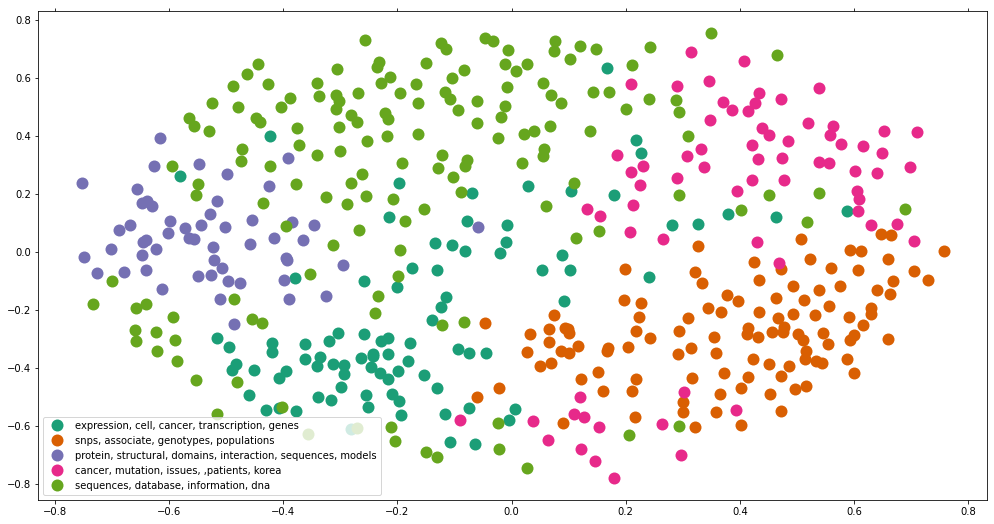

In [68]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.loc[i]['x'], df.loc[i]['y'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [69]:

plt.close()

In [70]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [73]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

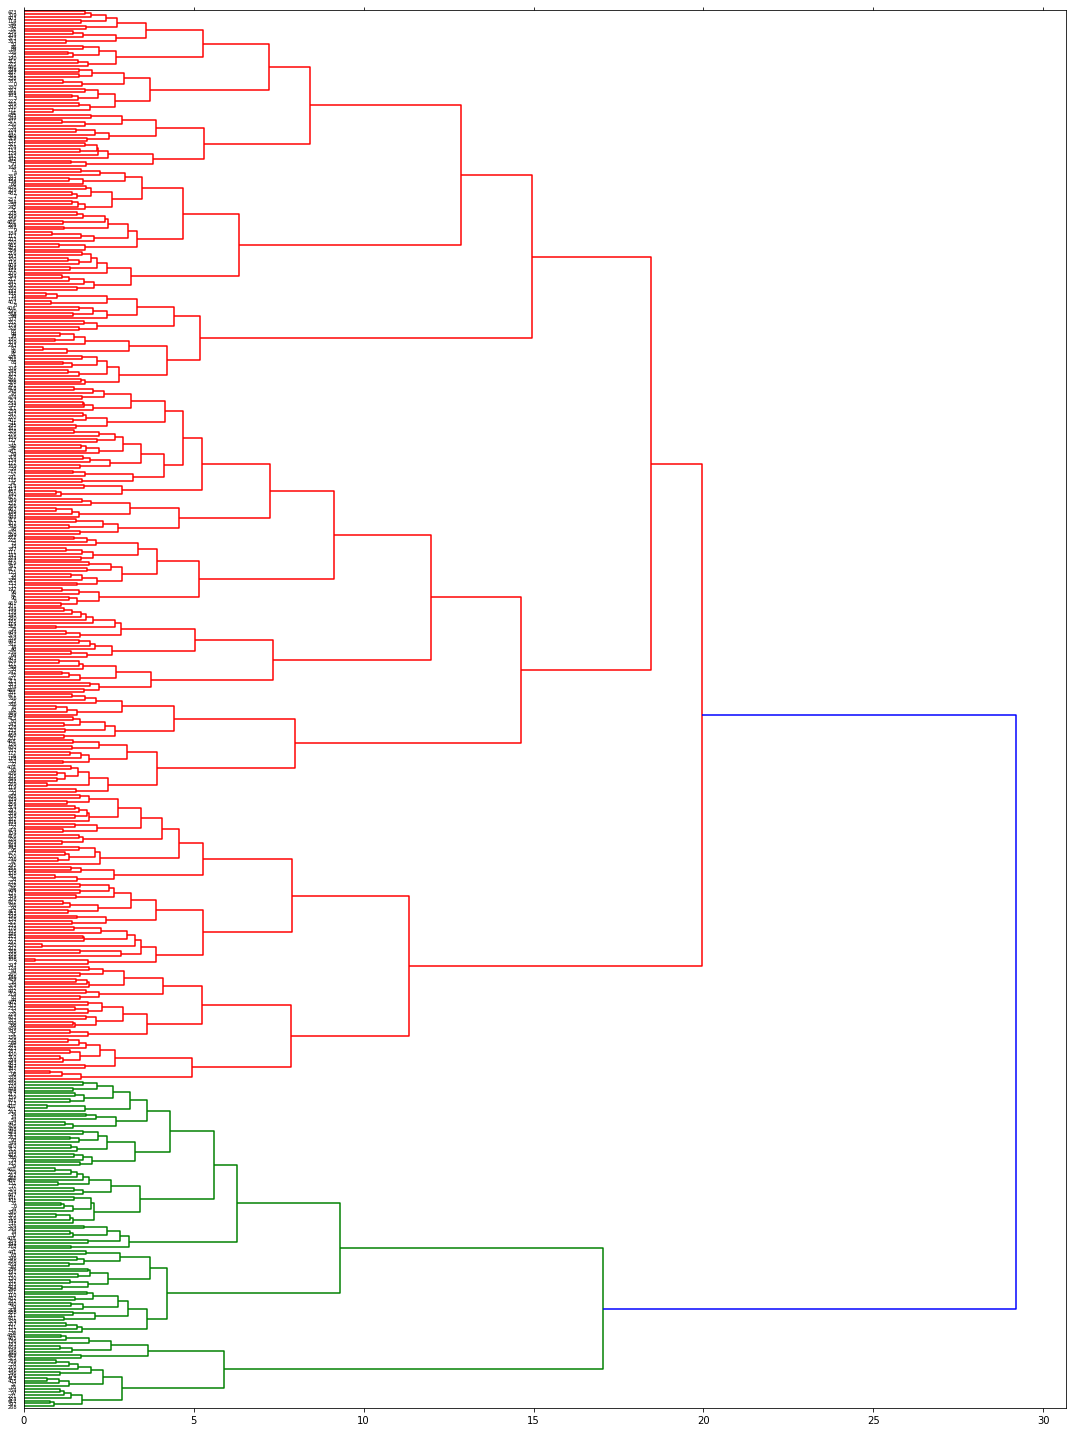

In [75]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [76]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
    

In [77]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [81]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in corpus]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 11.4 s, sys: 2.43 ms, total: 11.4 s
Wall time: 11.4 s
CPU times: user 14.4 s, sys: 47.7 ms, total: 14.4 s
Wall time: 14.4 s
CPU times: user 1.44 s, sys: 790 µs, total: 1.44 s
Wall time: 1.44 s


In [82]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [86]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000,passes=100)

CPU times: user 2min 26s, sys: 26 ms, total: 2min 26s
Wall time: 2min 26s


In [87]:
lda.show_topics()

[(0,
  '0.017*"genet" + 0.013*"popul" + 0.012*"associ" + 0.011*"sampl" + 0.009*"variant" + 0.009*"test" + 0.008*"marker" + 0.008*"diseas" + 0.008*"genotyp" + 0.007*"allel"'),
 (1,
  '0.032*"protein" + 0.014*"structur" + 0.014*"sequenc" + 0.008*"model" + 0.008*"predict" + 0.007*"interact" + 0.007*"domain" + 0.007*"target" + 0.006*"function" + 0.006*"bind"'),
 (2,
  '0.019*"cell" + 0.018*"express" + 0.013*"cancer" + 0.012*"genom" + 0.009*"human" + 0.009*"sequenc" + 0.009*"et" + 0.009*"transcript" + 0.008*"al" + 0.006*"mutat"'),
 (3,
  '0.014*"sequenc" + 0.010*"inform" + 0.009*"genom" + 0.009*"databas" + 0.008*"method" + 0.006*"set" + 0.006*"et" + 0.005*"biolog" + 0.005*"provid" + 0.005*"al"'),
 (4,
  '0.017*"associ" + 0.013*"et" + 0.012*"al" + 0.012*"patient" + 0.009*"signific" + 0.008*"level" + 0.008*"polymorph" + 0.007*"factor" + 0.007*"risk" + 0.006*"control"')]

In [89]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,:]
for i in topic_words:
    print([str(word) for word in i])
    print()

['0', "[('genet', 0.016579796), ('popul', 0.012984351), ('associ', 0.011755872), ('sampl', 0.011004562), ('variant', 0.009328409), ('test', 0.009023627), ('marker', 0.008314963), ('diseas', 0.007934511), ('genotyp', 0.007648969), ('allel', 0.0073057925), ('estim', 0.0068206065), ('select', 0.006725077), ('number', 0.006583779), ('method', 0.0060716406), ('trait', 0.0058951895), ('effect', 0.0058859535), ('region', 0.0058218683), ('individu', 0.005709934), ('signific', 0.0056423936), ('size', 0.005348877)]"]

['1', "[('protein', 0.03215743), ('structur', 0.013770308), ('sequenc', 0.013513848), ('model', 0.008215354), ('predict', 0.007910417), ('interact', 0.0073022796), ('domain', 0.006848546), ('target', 0.0068264822), ('function', 0.0063077807), ('bind', 0.0058797803), ('acid', 0.0057493346), ('residu', 0.0052741715), ('compound', 0.0046716197), ('amino', 0.004330631), ('show', 0.004291546), ('drug', 0.0042005326), ('strain', 0.003970484), ('found', 0.0038719012), ('molecular', 0.0037